In [192]:
from sklearn import datasets
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

In [193]:
work_directory = "../../combustiveis/"
dataset_name = "dataset_etanol_gasolina_guarulhos.csv"

df_original = pd.read_csv(work_directory + dataset_name, sep=",", decimal=".", encoding="cp860", index_col=False)

In [194]:
df = df_original

In [195]:
df = df[["Semestre", "Valor de Compra", "Valor de Venda", "Produto"]]

In [196]:
df = df.dropna()
df = df.drop_duplicates(subset=["Valor de Compra"])
df = df.drop_duplicates(subset=["Valor de Venda"])

In [197]:
df.head()

,Semestre,Valor de Compra,Valor de Venda,Produto
4,2020-01,3.8512,4.247,GASOLINA
5,2020-01,2.6860,2.949,ETANOL
11,2020-01,2.7692,3.199,ETANOL
12,2020-01,3.6744,4.299,GASOLINA
13,2020-01,2.6299,2.999,ETANOL


In [198]:
semestres = np.unique(df["Semestre"])

anos = np.unique([x.split("-")[0] for x in semestres])

for ano in anos:
    df = df.replace("^" + ano + ".*", str(ano), regex=True)

df = df.rename(columns={"Semestre": "Ano"})

contadores = df["Ano"].value_counts()

print(contadores)


2006    112
2004     97
2013     80
2020     72
2018     59
2016     58
2015     40
2010     32
2019     32
2012     26
2014     20
2005     18
2009     13
2017     12
2007      6
2011      5
2008      2
Name: Ano, dtype: int64


GASOLINA    366
ETANOL      318
Name: Produto, dtype: int64

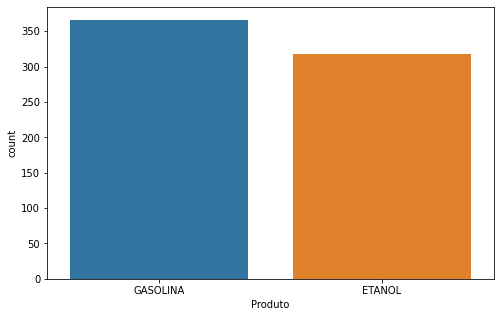

In [199]:
fig, ax = plt.subplots(figsize=(8, 5))
sns.countplot(x="Produto", data=df, ax=ax)

df["Produto"].value_counts()

<AxesSubplot:xlabel='Produto', ylabel='count'>

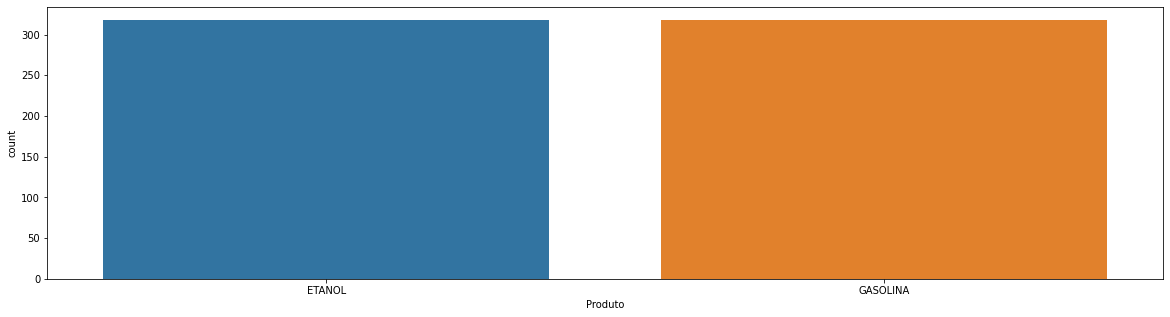

In [200]:
df_geral = pd.DataFrame()

labels = np.unique(df["Produto"])

for label in labels:
    periodo_subset = df.loc[df["Produto"] == label, :]
    sampled = periodo_subset.sample(318)
    df_geral = pd.concat([df_geral, sampled], ignore_index=True)

df = df_geral

fig, ax = plt.subplots(figsize=(20, 5))
sns.countplot(x="Produto", data=df, ax=ax)


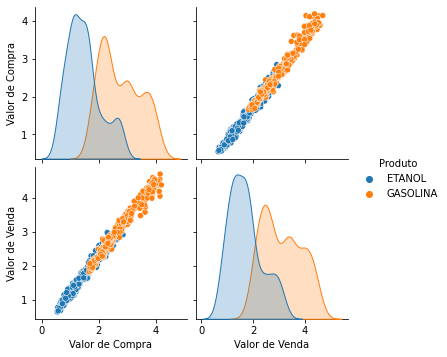

In [201]:
sns.pairplot(df, hue='Produto')

In [202]:
df['produto_int'] = pd.Categorical(df['Produto']).codes

In [203]:
df.head()

,Ano,Valor de Compra,Valor de Venda,Produto,produto_int
0,2020,2.7692,3.199,ETANOL,0
1,2004,0.6612,0.849,ETANOL,0
2,2009,1.1289,1.391,ETANOL,0
3,2018,2.2402,2.275,ETANOL,0
4,2007,0.8560,1.070,ETANOL,0


In [204]:
# Definindo valores que serão utilizados
X = df[["Valor de Compra", "Valor de Venda"]]
y = df["produto_int"]

# Separando dados de treino e de teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [205]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

sc.fit(X_train)

X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [206]:
from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier(n_neighbors=50, p=2, metric='minkowski')

KNN.fit(X_train_std, y_train)

KNeighborsClassifier(n_neighbors=50)

In [207]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined_std = np.hstack((y_train, y_test))

In [208]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import matplotlib
from distutils.version import LooseVersion

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
    np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.8,
                    color=colors[idx],
                    marker=markers[idx],
                    label=cl,
                    edgecolor='black')
        
    # highlight test examples
    if test_idx:
        # plot all examples
        X_test, y_test = X[test_idx, :], y[test_idx]
    
    if LooseVersion(matplotlib.__version__) < LooseVersion('0.3.4'):
        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100,
                    label='test set')
    else:
        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='none',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100,
                    label='test set')

/tmp/ipykernel_7985/1485689645.py:24: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


UnboundLocalError: local variable 'X_test' referenced before assignment

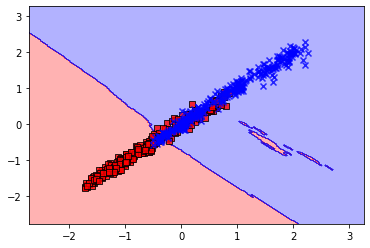

In [209]:
plot_decision_regions(X_combined_std, y_combined_std, classifier=KNN)